In [1]:
import tensorflow as tf

from data_loader.kitty_road_data_loader import KittyRoadLoader
from models.UNet_model import UNetModel
from trainers.road_trainer import RoadTrainer
from utils.config import process_config
from utils.dirs import create_dirs
from utils.logger import Logger
from utils.utils import get_args
import matplotlib.pyplot as plt
import os 
json_file = "configs/Unet_KittyRoadDataset_config.json"
json_file

config = process_config(json_file)
print(config)

batch_size: 2
checkpoint_dir: ./experiments\Unet_kittyroad\checkpoint/
data_path: C:/Users/TT260256/My Project/NNs/data_road
exp_name: Unet_kittyroad
image_size:
- 320
- 480
learning_rate: 0.00023949513325777832
max_to_keep: 5
num_epochs: 5
num_iter_per_epoch: 100
summary_dir: ./experiments\Unet_kittyroad\summary/



In [2]:
data = KittyRoadLoader(config)
img, mask = data.get_data_element("all_data",0)

Yeah this is the path to dataset : C:/Users/TT260256/My Project/NNs/data_road
Size of all raw images :  289 samples with size  (375, 1242, 3)
Size of all raw labels  :  289 samples with size  (375, 1242, 3)
Size of all raw masks  :  289 samples with size  (375, 1242)
Pre-processing the data...
Size of images collection :  (2312, 320, 480, 3)
Size of masks collection :  (2312, 320, 480)


In [3]:
sess = tf.Session()
model = UNetModel(config)
logger = Logger(sess,config)
trainer = RoadTrainer(sess,model,data,config,logger)
trainer.train()

Epoch  0


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:37<00:00,  1.54s/it]


-->Last epoch loss     :  0.38358828
-->Last epoch accuracy :  0.30876264
-->Last test loss     :  0.1747635
-->Last test accuracy :  0.48665625
Saving model...
Model saved
Epoch  1


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:31<00:00,  1.49s/it]


-->Last epoch loss     :  0.18248415
-->Last epoch accuracy :  0.51670825
-->Last test loss     :  0.12853315
-->Last test accuracy :  0.6211894
Saving model...
Model saved
Epoch  2


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:28<00:00,  1.48s/it]


-->Last epoch loss     :  0.14020628
-->Last epoch accuracy :  0.6254179
-->Last test loss     :  0.10928996
-->Last test accuracy :  0.71668744
Saving model...
Model saved
Epoch  3


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:28<00:00,  1.48s/it]


-->Last epoch loss     :  0.1293871
-->Last epoch accuracy :  0.6564184
-->Last test loss     :  0.1131617
-->Last test accuracy :  0.7769854
Saving model...
Model saved
Epoch  4


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:28<00:00,  1.48s/it]


-->Last epoch loss     :  0.09900087
-->Last epoch accuracy :  0.7327919
-->Last test loss     :  0.12771171
-->Last test accuracy :  0.81997734
Saving model...
Model saved


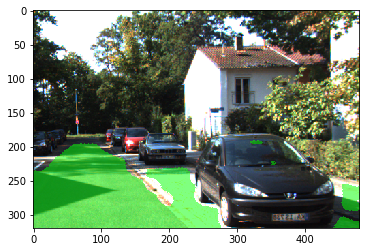

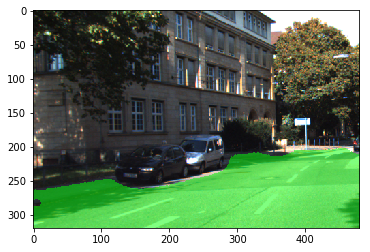

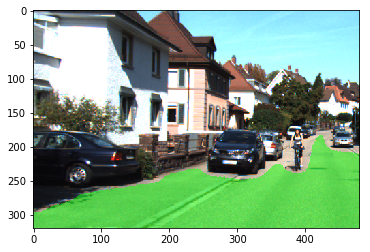

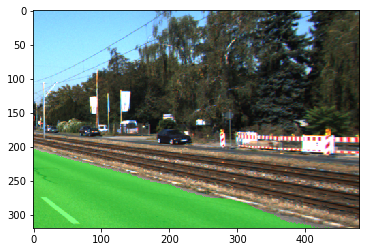

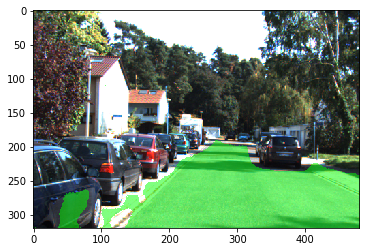

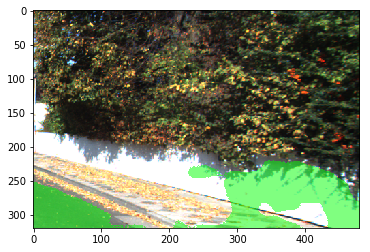

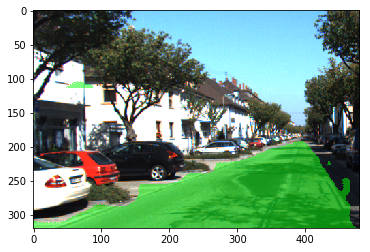

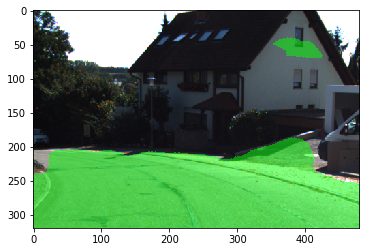

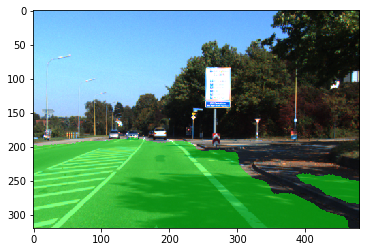

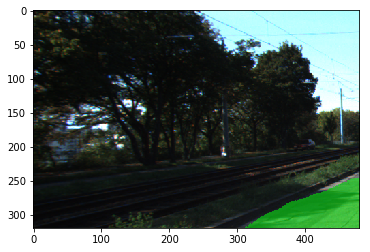

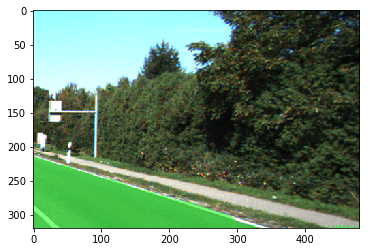

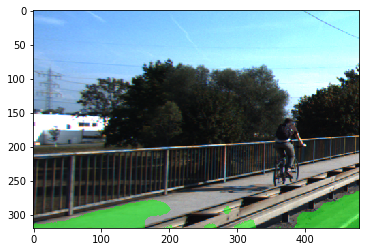

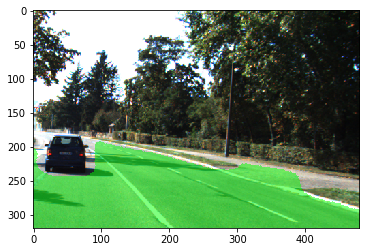

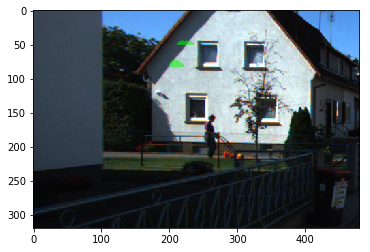

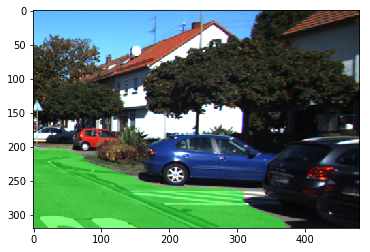

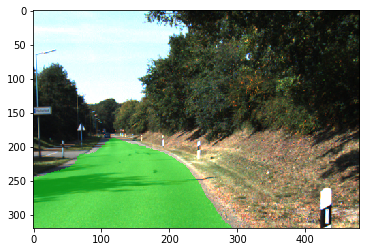

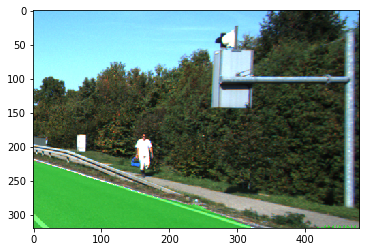

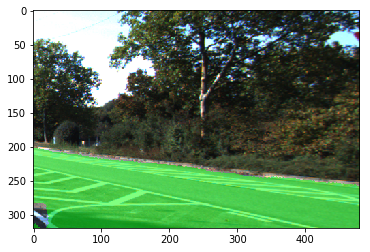

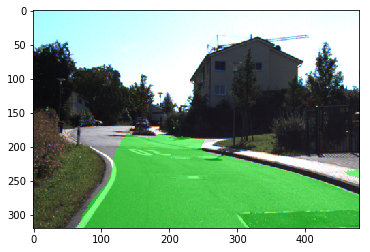

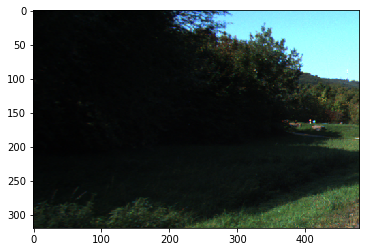

In [4]:
test = [data.get_data_element("all_data",i)[0] for i in range(20)]
for img in test :    
    trainer.predict(img)